# _**Application of GEOSPACE-ADE v(1.1.9-beta) at Olive Tree**_

_Authors: Concetta D'Amato, Niccolò Tubini and Riccardo Rigon_



License: Creative Commons 4.0

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
import math
import xarray as xr
import warnings
import plotly.graph_objects as go
import plotly.express as px


import pandas as pd
warnings.filterwarnings('ignore')
style.available
style.use('seaborn-whitegrid')
from GEOSPACE_Output import*

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
}
plt.rcParams.update(nice_fonts)



In [2]:
project_path = os.path.dirname(os.getcwd())

In [3]:
os.chdir(project_path+'/output/OliveTree/1')
#os.listdir()

In [4]:
file_name = 'OMS_ADEwaterstress_Olive0512_04_0000.nc'

In [5]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:                                (depth: 101, dualDepth: 101, time: 1234)
Coordinates:
  * depth                                  (depth) float64 -0.4185 ... 0.0
  * dualDepth                              (dualDepth) float64 -0.42 ... 0.0
  * time                                   (time) datetime64[ns] 2018-05-16 ....
Data variables: (12/20)
    psiIC                                  (depth) float64 ...
    psi                                    (time, depth) float64 ...
    rootIC                                 (depth) float64 ...
    theta                                  (time, depth) float64 ...
    waterVolume                            (time, depth) float64 ...
    darcyVelocity                          (time, dualDepth) float64 ...
    ...                                     ...
    timeVariationsWConcentration           (time, depth) float64 ...
    dispersionSoluteFluxes                 (time, dualDepth) float64 ...
    advectionSoluteFluxes                  (time, dualDepth) float64 ...
    errorWaterVolumeConcentration          (time) float64 ...
    errorVolume                            (time) float64 ...
    controlVolume                          (depth) float64 ...
Attributes: (12/15)
    Description_of_the_problem:                            GEOSPACE1D
    Top_boundary_condition_for_solute_equation:            Top Dirichlet
    Bottom_boundary_condition_for_solute_equation:         Bottom No Gradient
    Top_boundary_condition_for_Richards_equation:           
    Bottom_boundary_condition_for_Richards_equation:       Bottom Free Drainage
    path_top_boundary_condition_for_solute_equation:        
    ...                                                    ...
    path_grid:                                             /Users/concettadam...
    time_delta:                                             
    swrc_model:                                            {Water Depth,Van G...
    soil_hydraulic_conductivity_model:                     {null,Mualem Van G...
    interface_hydraulic_conductivity_model:                 
    interface_dispersion_coefficient_model:

## Plot Simulation Error

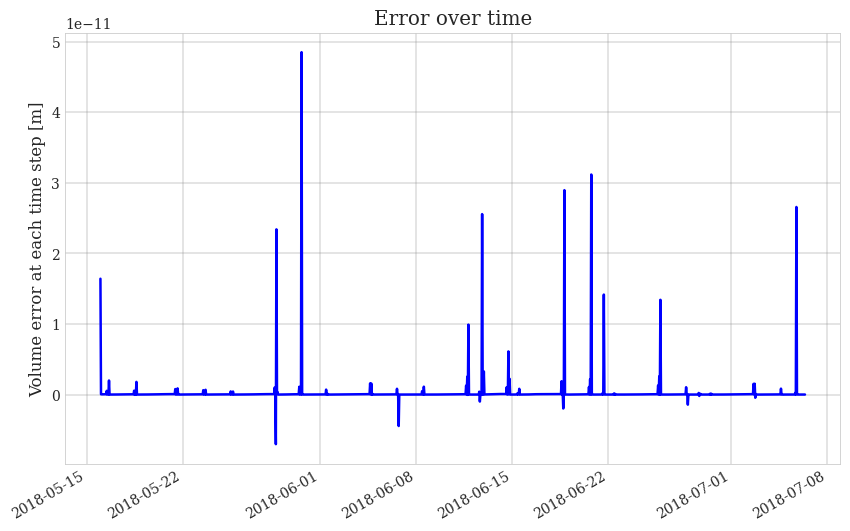

In [6]:
fig = plt.figure(figsize=(10,14/2.5))
ax = ds.errorVolume.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

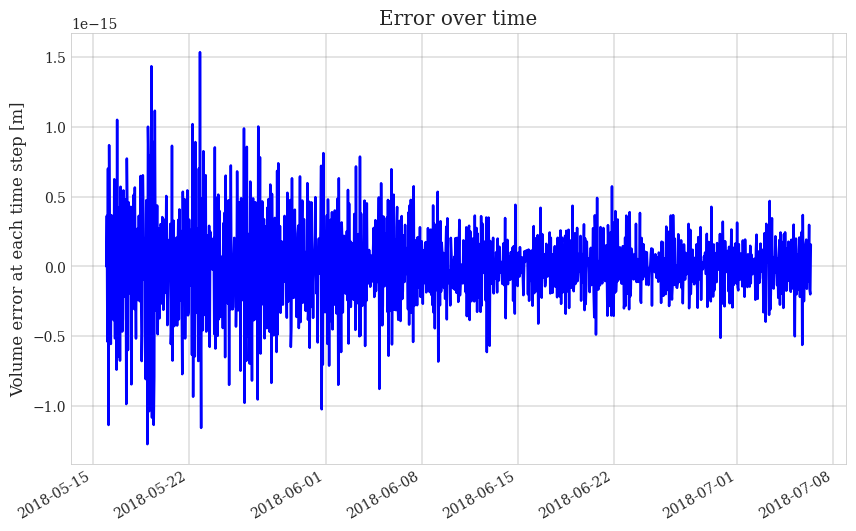

In [7]:
fig = plt.figure(figsize=(10,14/2.5))
ax = ds.errorWaterVolumeConcentration.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Initial Condition 

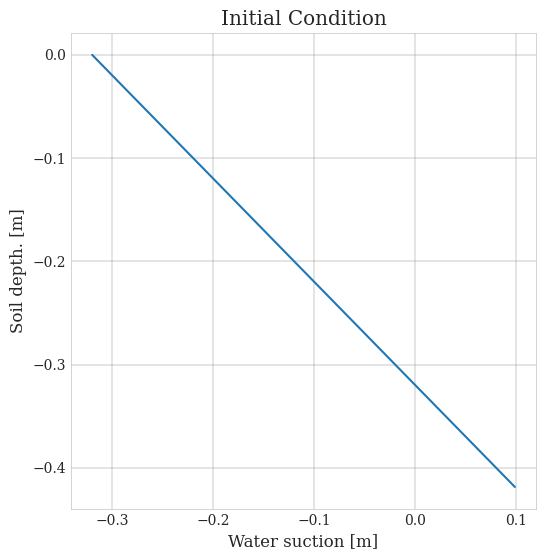

In [8]:
fig = plt.figure(figsize=(6,10/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

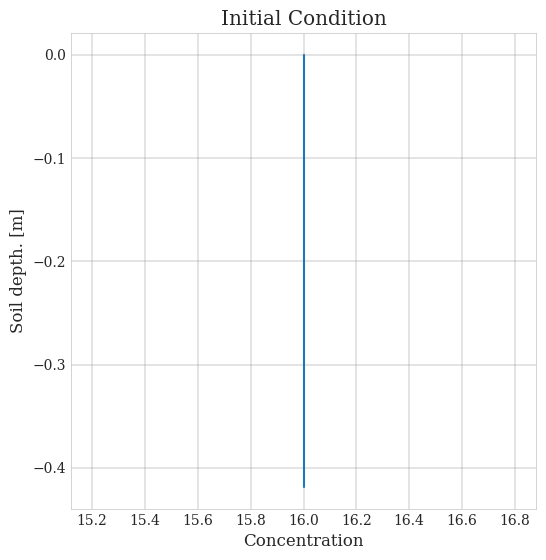

In [9]:
fig = plt.figure(figsize=(6,10/1.62))
ds.concentrationIC.plot(y='depth')
plt.xlabel('Concentration')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)


<br>

### Plot specifical depth

Define a vector of depth 'myDepth' you would plot 

In [10]:
myDepth = [-0.03,-0.10,-0.20,-0.35]

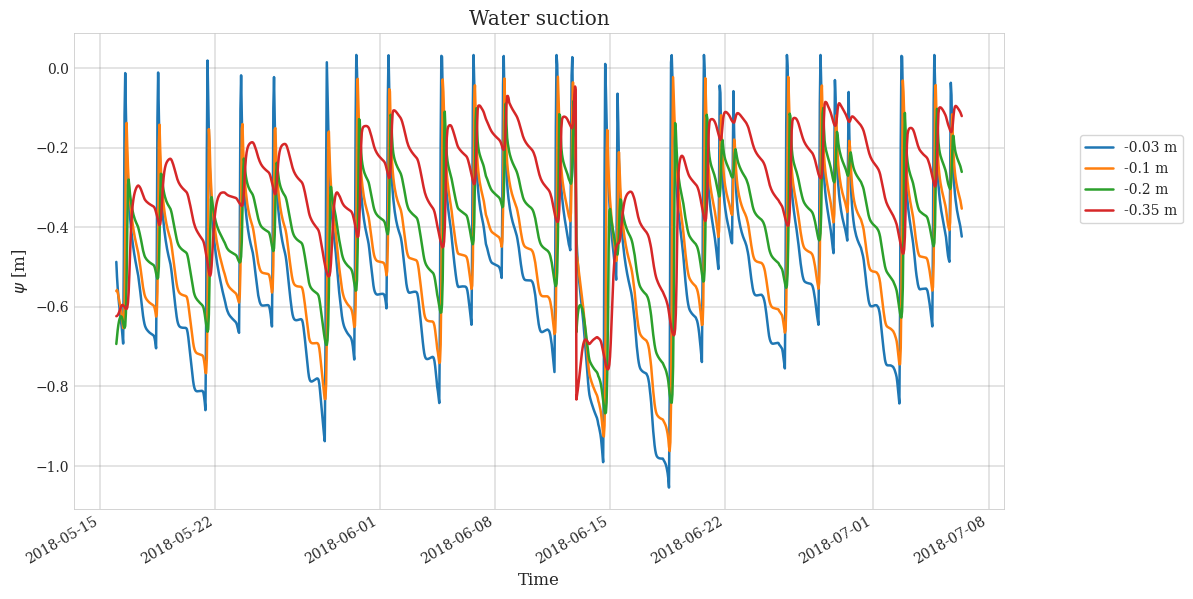

In [11]:
fig = plt.figure(figsize=(12,10/1.618))
for i in range (0,len(myDepth)):
    ds.psi.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

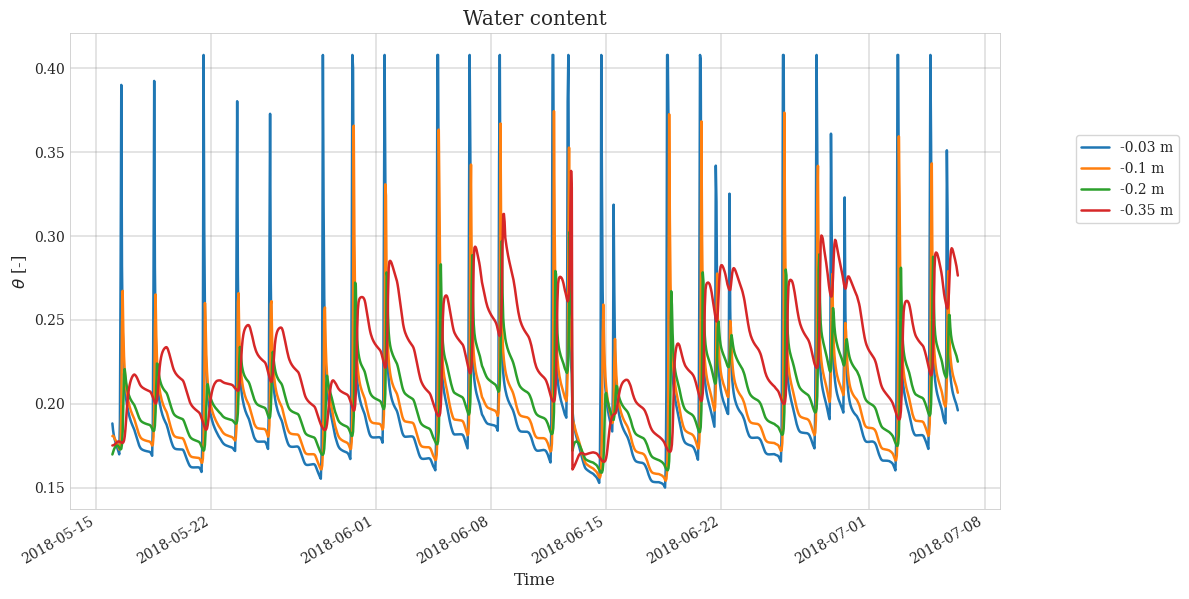

In [12]:
fig = plt.figure(figsize=(12,10/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

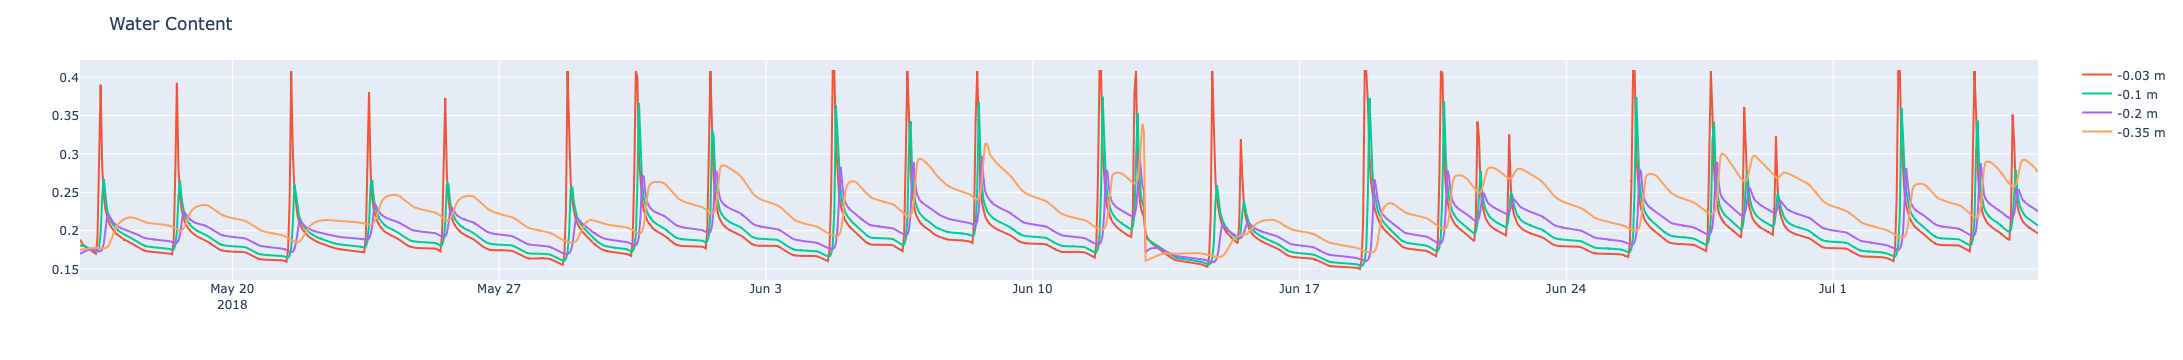

In [13]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.theta.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'Water Content')
fig.show()

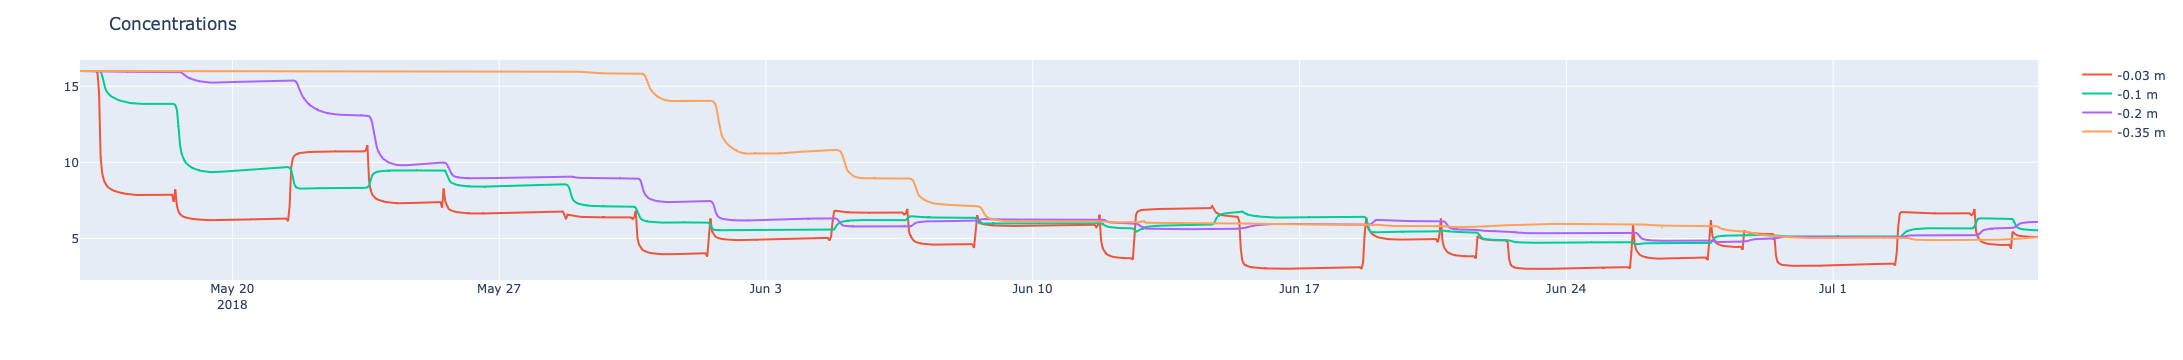

In [14]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'Concentrations')
fig.show()

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [ ]:
root_depth = -0.42
evaporation_layer_depth = -0

In [ ]:
myDate = ['2018-05-17 00:00','2018-05-25 01:00', '2018-06-17 01:00', '2018-07-06 01:00']


In [ ]:
fig = plt.figure(figsize=(6,10/1.62))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
#plt.xlim([-3.5, 0.2])
plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
plt.text(-0.1, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(-0.1, evaporation_layer_depth-0.050, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [ ]:
fig = plt.figure(figsize=(6,10/1.62))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

# Plot Evapotranspiration

In [ ]:
os.chdir(project_path+'/output/OliveTree/1')
#os.listdir()

In [ ]:
df = pd.read_csv('EvapoTranspiration_1_ADEwaterstress_Olive0512_01.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','Prospero']
fig = px.line(df, x='Datetime', y='Prospero')
fig.update_layout(
        title='Prospero Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [ ]:
df2 = pd.read_csv('ET.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','SapFlow']
fig = px.line(df2, x='Datetime', y='SapFlow')
fig.update_layout(
        title='SapFlow Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [ ]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Prospero'], mode='lines', name='T-Prospero [mm]'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df2['SapFlow'], mode='lines', name='SapFlow [mm]'))
fig.update_layout(
        title='Compare Transpiration',
        xaxis_title="Date",
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Transpiration -[mm]$",
        font=dict(size=14))
fig.show()

In [15]:
os.chdir(project_path+'/data/OliveTree/1')

In [16]:
df = pd.read_csv('ISO3.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','c03']

In [17]:
df2 = pd.read_csv('ISO10.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','c10']

In [18]:
df3 = pd.read_csv('ISO20.csv',skiprows=6,parse_dates=[1])
df3 = df3.drop(['Format'],axis=1) 
df3.columns = ['Datetime','c20']

In [19]:
df4 = pd.read_csv('ISO35.csv',skiprows=6,parse_dates=[1])
df4 = df4.drop(['Format'],axis=1) 
df4.columns = ['Datetime','c35']

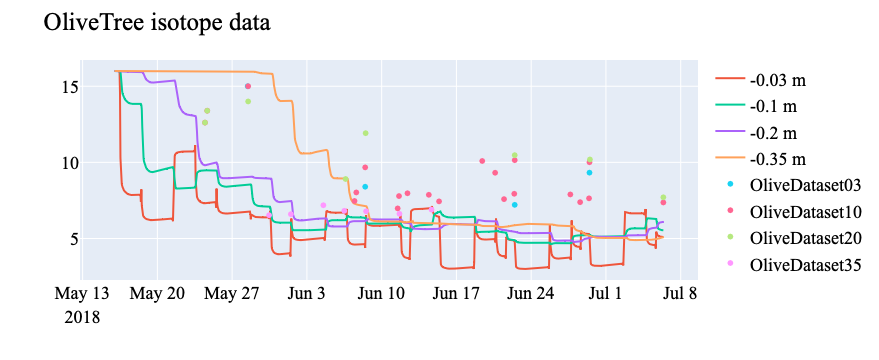

In [20]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))

fig.add_trace(go.Scatter(x=df['Datetime'], y=df['c03'], mode='markers', name='OliveDataset03'))
fig.add_trace(go.Scatter(x=df2['Datetime'],y=df2['c10'], mode='markers', name='OliveDataset10'))
fig.add_trace(go.Scatter(x=df3['Datetime'],y=df3['c20'], mode='markers', name='OliveDataset20'))
fig.add_trace(go.Scatter(x=df4['Datetime'],y=df4['c35'], mode='markers', name='OliveDataset35'))

fig.update_layout(
        title='OliveTree isotope data',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        #yaxis_title="$Leakage -[mm h^{-1}]$",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

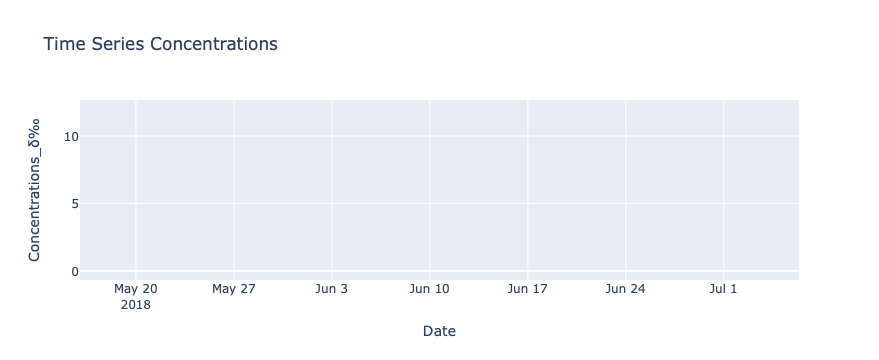

In [21]:
kl = pd.read_csv('O18.csv' ,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Date'
kl.columns.values[1] = 'Concentrations_δ‰' 
fig = px.line(kl, x='Date', y='Concentrations_δ‰', title='Time Series Concentrations')
fig.show()

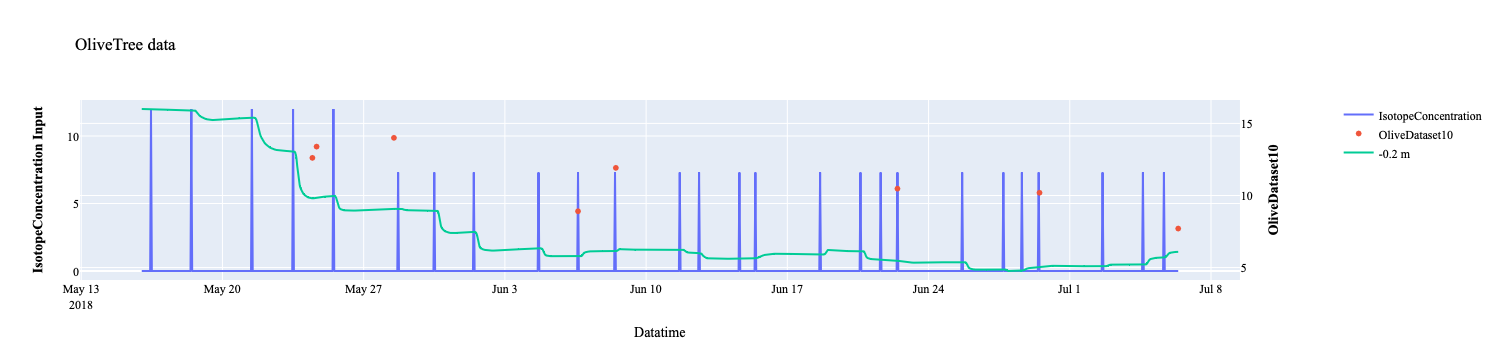

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=kl.Date.values, y=kl['Concentrations_δ‰'], name="IsotopeConcentration"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df2.Datetime.values, y=df3['c20'],mode='markers', name="OliveDataset10"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=ds.time.values[:], y=ds.concentrations.sel(depth=myDepth[2], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[2])+' m'),
    secondary_y=True,
)
#fig.add_trace(go.Scatter(x=df2['Datetime'],y=df2['c10'], mode='markers', name='OliveDataset10'))

# Set x-axis title
fig.update_xaxes(title_text="Datatime")

# Set y-axes titles
fig.update_yaxes(title_text="<b>IsotopeConcentration Input</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>OliveDataset10</b>", secondary_y=True)
fig.update_layout(
        title='OliveTree data',
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        font=dict(size=12))
fig.show()

In [ ]:
ETgeospace= df.Prospero.sum()
ETgeospace

In [ ]:
ETolive= df2.SapFlow.sum()
ETolive